In [ ]:
# Youtube trending video dataset analysis

In [5]:
import numpy as np                      # numpy and pandas: Core libraries for numerical computations and data manipulation
import pandas as pd
import matplotlib.pyplot as plt         # matplotlib.pyplot and seaborn: Used for plotting and data visualization
import seaborn as sns
import json

import scipy.stats as stats              # Provides statistical functions and tests
from collections import Counter          # Handy for counting elements (like word frequencies)
from wordcloud import WordCloud          # For generating word cloud visualizations
from nltk.corpus import stopwords        # Stopwords from the NLTK library, useful in text preprocessing
import re                                # re: Regular expressions, used for pattern matching in text

In [4]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 262.6 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/299.9 kB 581.0 kB/s eta 0:00:01
   ---------------------------- ----------- 215.0/299.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
# Load Datasets

In [7]:
data = pd.read_csv('C:/Users/DELL/Downloads/PowerBI Project/USvideos.csv')

print(data.shape)

# loading category json file
category_json_path = './US_category_id.json'

# Load and parse the category JSON file
with open(category_json_path) as file:
    category_data = json.load(file)

# Extracting category names from the JSON file
category_dict = {int(category['id']): category['snippet']['title'] for category in category_data['items']}

# Merge the category names with the main dataframe
data['category_name'] = data['category_id'].map(category_dict)


data.head()

(40949, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [ ]:
Types of variables# 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [8]:
data.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
category_name             object
dtype: object

In [10]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables'.format(len(categorical)))

There are 9 categorical variables


In [11]:
data[categorical].head()

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,SHANtell martin,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...,Entertainment


In [12]:
for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

description 0.013919753840142617


In [ ]:
'''
Trending Video Analysis: Analyze which videos are trending and identify any common characteristics among them, 
such as category, channel, or tags.

In [13]:
trending_days_count = data.groupby('video_id')['trending_date'].nunique()

trending_days_df = trending_days_count.reset_index()

trending_days_df.rename(columns={'trending_date': 'trending_days'}, inplace=True)

print(trending_days_df.head())

      video_id  trending_days
0  -0CMnp02rNY              6
1  -0NYY8cqdiQ              1
2  -1Hm41N0dUs              3
3  -1yT-K3c6YI              4
4  -2RVw2_QyxQ              3


video_id
-0CMnp02rNY    6.891170e+05
-0NYY8cqdiQ    5.637460e+05
-1Hm41N0dUs    1.835892e+06
-1yT-K3c6YI    1.943108e+05
-2RVw2_QyxQ    6.943467e+04
                   ...     
zwEn-ambXLw    1.893647e+05
zxUwbflE1SY    2.117902e+05
zxwfDlhJIpw    7.724317e+06
zy0b9e40tK8    3.787500e+05
zzQsGL_F9_c    1.766235e+05
Name: views, Length: 6351, dtype: float64


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Relationship between Number of Days Trending and Average Views')

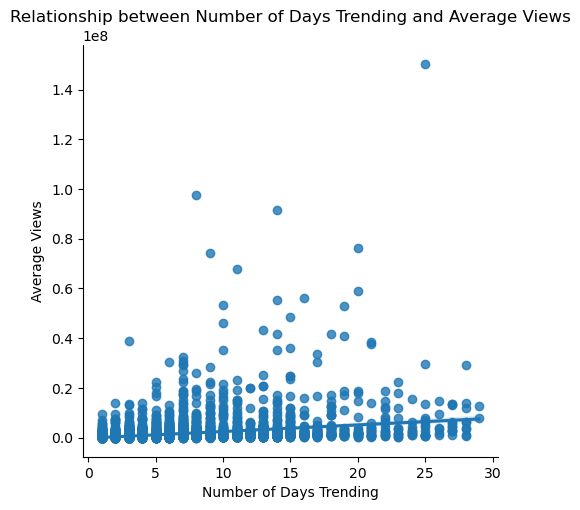

In [14]:
mean_views_per_video = data.groupby('video_id')['views'].mean()
trending_views_df = pd.DataFrame(mean_views_per_video).merge(pd.DataFrame(trending_days_count), left_index=True, right_index=True)

print(mean_views_per_video)

# Now let's analyze the relationship between trending days and views
# Create a scatter plot with a linear fit
sns.lmplot(x='trending_date', y='views', data=trending_views_df)
plt.xlabel('Number of Days Trending')
plt.ylabel('Average Views')
plt.title('Relationship between Number of Days Trending and Average Views')

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


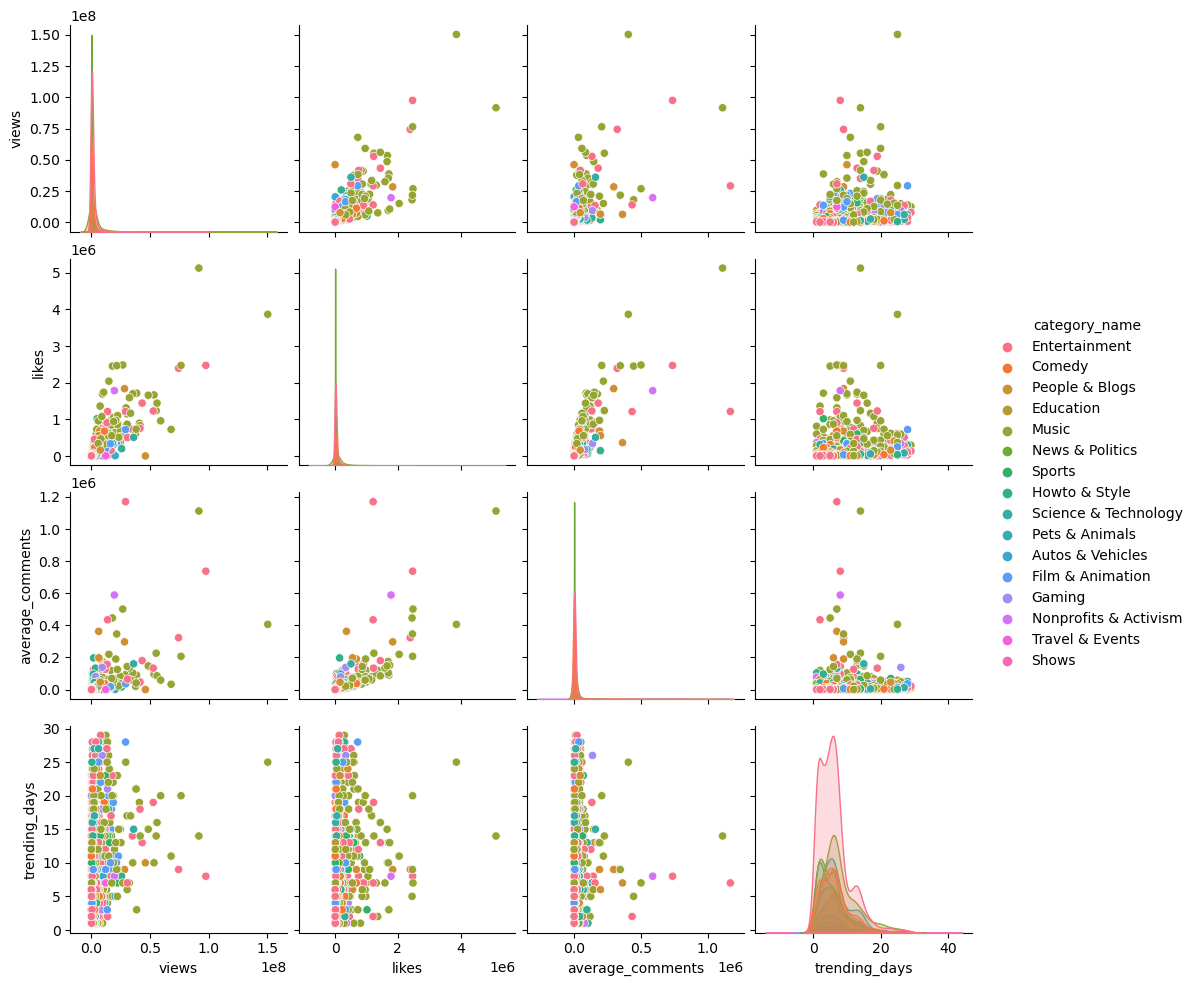

                     views     likes  average_comments  trending_days
views             1.000000  0.831174          0.610545       0.266196
likes             0.831174  1.000000          0.779986       0.213573
average_comments  0.610545  0.779986          1.000000       0.116580
trending_days     0.266196  0.213573          0.116580       1.000000


In [16]:
# Calculate the number of days trending for each video
trending_days = data.groupby('video_id')['trending_date'].nunique()
# Calculate the average views, likes, and comments for each video
average_metrics = data.groupby('video_id')[['views', 'likes', 'comment_count']].mean()

# Merge the calculations with the category information
merged_data = (average_metrics
               .merge(trending_days, left_index=True, right_index=True)
               .merge(data[['video_id', 'category_name']].drop_duplicates(), left_index=True, right_on='video_id'))

# Rename columns for clarity
merged_data.rename(columns={'trending_date': 'trending_days', 'comment_count': 'average_comments'}, inplace=True)

# Analyze the relationship between the variables
# You can use a pairplot to visualize the relationships
sns.pairplot(merged_data, vars=['views', 'likes', 'average_comments', 'trending_days'], hue='category_name')
plt.show()

# You can also compute the correlation matrix
correlation_matrix = merged_data[['views', 'likes', 'average_comments', 'trending_days']].corr()
print(correlation_matrix)


In [17]:
groups = data.groupby('category_name')['views'].apply(list)
# Perform ANOVA
f_val, p_val = stats.f_oneway(*groups)

# Print the F-value and p-value
print('F-value:', f_val)
print('p-value:', p_val)

F-value: 166.16394108097995
p-value: 0.0


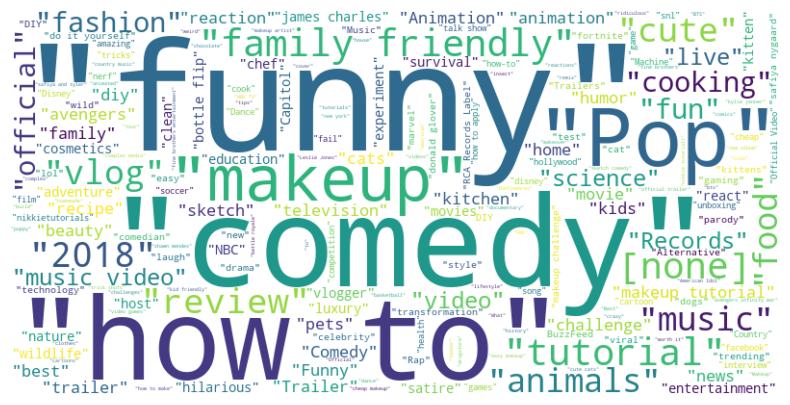

In [18]:
# Identify the top trending videos
top_trending_videos = trending_days.sort_values(ascending=False).head(int(len(trending_days) * 0.1))

# Filter the dataset for these top videos
top_videos = data[data['video_id'].isin(top_trending_videos.index)]

# Combine and count tags
tags = '|'.join(top_videos['tags'].dropna()).split('|')
tag_counts = Counter(tags)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
# Calculate the engagement ratios
data['likes_to_views_ratio'] = data['likes'] / data['views']
data['comments_to_views_ratio'] = data['comment_count'] / data['views']
data['dislikes_to_views_ratio'] = data['dislikes'] / data['views']

# Group by 'video_id' and calculate the mean for the ratios and other engagement metrics
engagement_metrics = data.groupby('video_id').agg({
    'likes_to_views_ratio': 'mean',
    'comments_to_views_ratio': 'mean',
    'dislikes_to_views_ratio': 'mean',
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

# Get descriptive statistics
engagement_summary = engagement_metrics.describe()

# Print the summary
print(engagement_summary)

       likes_to_views_ratio  comments_to_views_ratio  dislikes_to_views_ratio  \
count           6351.000000              6351.000000              6351.000000   
mean               0.032663                 0.004517                 0.001652   
std                0.026795                 0.005596                 0.004233   
min                0.000000                 0.000000                 0.000000   
25%                0.012477                 0.001588                 0.000517   
50%                0.026573                 0.003032                 0.000890   
75%                0.045249                 0.005319                 0.001592   
max                0.226856                 0.101939                 0.190366   

              views         likes      dislikes  comment_count  
count  6.351000e+03  6.351000e+03  6.351000e+03   6.351000e+03  
mean   1.475769e+06  4.863096e+04  2.542702e+03   5.896016e+03  
std    4.612219e+06  1.665437e+05  2.516670e+04   3.037680e+04  
min    5.5

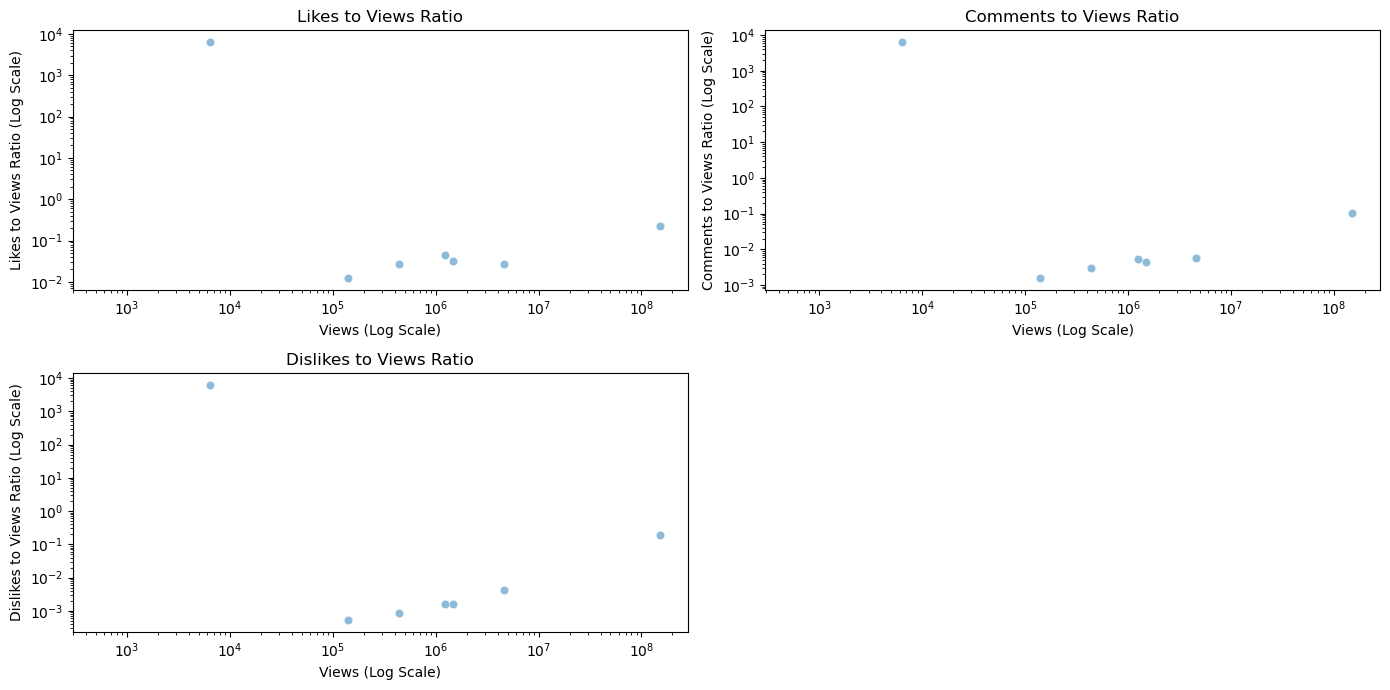

In [20]:
# Likes to Views Ratio Scatter Plot
plt.figure(figsize=(14, 7))
plt.subplot(2, 2, 1)
sns.scatterplot(data=engagement_summary, x='views', y='likes_to_views_ratio', alpha=0.5)
plt.title('Likes to Views Ratio')
plt.xscale('log')  # Using a log scale due to the wide range of views
plt.yscale('log')  # Using a log scale due to the wide range of ratios
plt.xlabel('Views (Log Scale)')
plt.ylabel('Likes to Views Ratio (Log Scale)')

# Comments to Views Ratio Scatter Plot
plt.subplot(2, 2, 2)
sns.scatterplot(data=engagement_summary, x='views', y='comments_to_views_ratio', alpha=0.5)
plt.title('Comments to Views Ratio')
plt.xscale('log')  # Using a log scale due to the wide range of views
plt.yscale('log')  # Using a log scale due to the wide range of ratios
plt.xlabel('Views (Log Scale)')
plt.ylabel('Comments to Views Ratio (Log Scale)')

# Dislikes to Views Ratio Scatter Plot
plt.subplot(2, 2, 3)
sns.scatterplot(data=engagement_summary, x='views', y='dislikes_to_views_ratio', alpha=0.5)
plt.title('Dislikes to Views Ratio')
plt.xscale('log')  # Using a log scale due to the wide range of views
plt.yscale('log')  # Using a log scale due to the wide range of ratios
plt.xlabel('Views (Log Scale)')
plt.ylabel('Dislikes to Views Ratio (Log Scale)')

# Show the plots
plt.tight_layout()
plt.show()

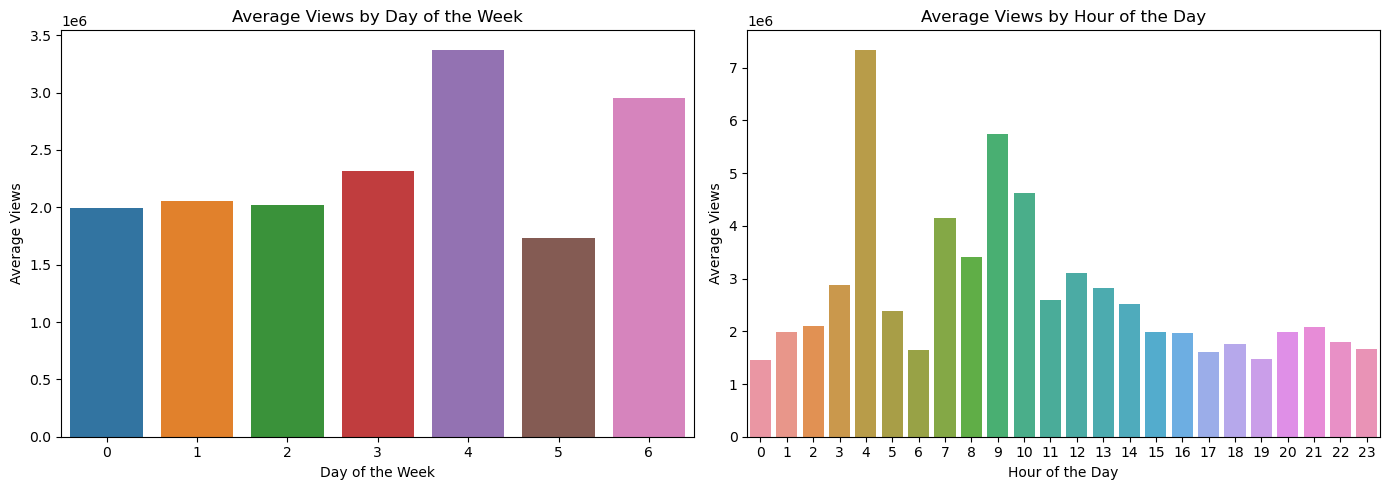

In [21]:
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_day'] = data['publish_time'].dt.dayofweek
data['publish_hour'] = data['publish_time'].dt.hour

# Group by publish day and calculate mean views
day_views = data.groupby('publish_day')['views'].mean()

# Group by publish hour and calculate mean views
hour_views = data.groupby('publish_hour')['views'].mean()

# Create subplots for day and hour analyses
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Day of the Week Analysis
sns.barplot(x=day_views.index, y=day_views.values, ax=axes[0])
axes[0].set_title('Average Views by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average Views')

# Hour of the Day Analysis
sns.barplot(x=hour_views.index, y=hour_views.values, ax=axes[1])
axes[1].set_title('Average Views by Hour of the Day')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average Views')

plt.tight_layout()
plt.show()


In [22]:
# Extract timestamp information (day of the week)
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_day'] = data['publish_time'].dt.dayofweek

# Define the days of the week as groups (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
groups = [data[data['publish_day'] == i]['views'] for i in range(7)]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Check the p-value to determine significance
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("The differences in average views among days of the week are statistically significant.")
else:
    print("There is no statistically significant difference in average views among days of the week.")

The differences in average views among days of the week are statistically significant.


In [ ]:
'''
Text Analysis of Video Titles and Descriptions: Perform text analysis on video titles and descriptions to identify common keywords or themes in trending videos.
'''

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

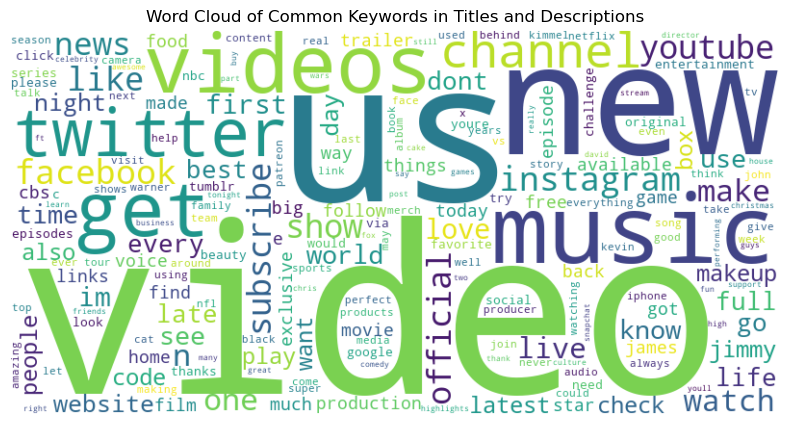

In [26]:
# Combine title and description into a single text column
data['text'] = data['title'] + ' ' + data['description']

# Function to preprocess and tokenize text
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = str(text)  # Convert to string to handle potential NaN values
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [token for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return tokens

# Apply text preprocessing and tokenization, handling missing values
data['tokens'] = data['text'].apply(preprocess)

# Calculate word frequencies
word_freq = Counter()
for tokens in data['tokens']:
    word_freq.update(tokens)
    
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Keywords in Titles and Descriptions')
plt.show()

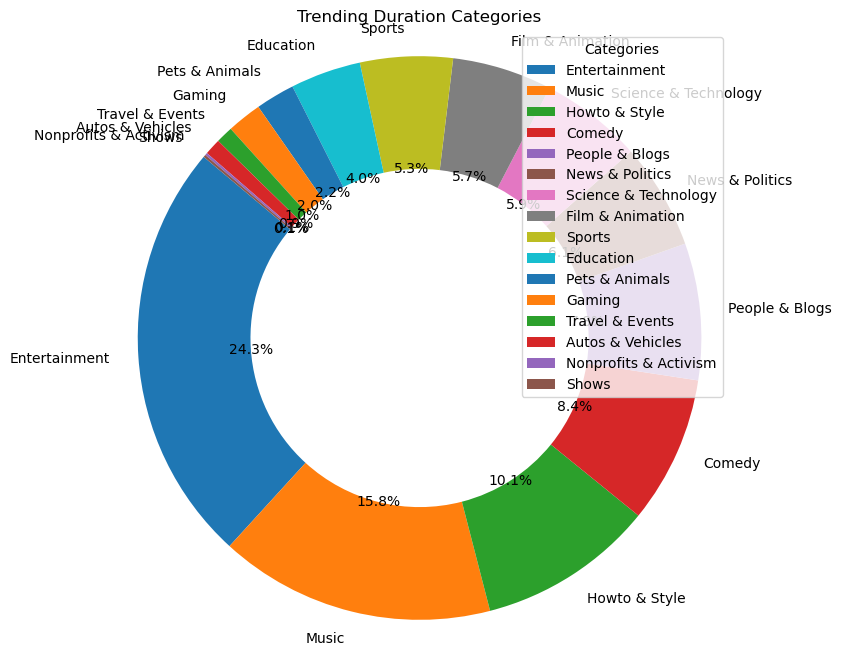

In [24]:
# Data Processing for Donut Graph (Trending Duration Categories)
# Calculate trending duration categories and their counts
trending_duration_counts = data['category_name'].value_counts()

# Create a Donut Graph
plt.figure(figsize=(8, 8))
plt.pie(trending_duration_counts, labels=trending_duration_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.axis('equal')  # Equal aspect ratio ensures that the Donut Graph is circular
plt.title('Trending Duration Categories')
plt.legend(title='Categories', loc='upper right')
plt.show()